#Import Package

In [29]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter

#Read Data

In [14]:
df = pd.read_csv('online_retail_II.csv')
df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12.0,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12.0,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12.0,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48.0,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24.0,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
...,...,...,...,...,...,...,...,...
873941,567454,22584,PACK OF 6 PANNETONE GIFT BOXES,6.0,2011-09-20 12:12:00,2.55,15839.0,United Kingdom
873942,567454,22583,PACK OF 6 HANDBAG GIFT BOXES,6.0,2011-09-20 12:12:00,2.55,15839.0,United Kingdom
873943,567454,20727,LUNCH BAG BLACK SKULL.,10.0,2011-09-20 12:12:00,1.65,15839.0,United Kingdom
873944,567454,20728,LUNCH BAG CARS BLUE,10.0,2011-09-20 12:12:00,1.65,15839.0,United Kingdom


In [15]:
# Mengecek missing values untuk setiap kolom
missing_values = df.isnull().sum()
missing_values

Invoice             0
StockCode           1
Description      4145
Quantity            1
InvoiceDate         1
Price               1
Customer ID    201594
Country             1
dtype: int64

In [16]:
duplicate_rows = df.duplicated().sum()
duplicate_rows

31766

In [17]:
# Mengecek outlier untuk kolom numerik (Quantity dan Price)
# Menggunakan metode IQR (Interquartile Range) untuk mendeteksi outlier
Q1_quantity = df['Quantity'].quantile(0.25)
Q3_quantity = df['Quantity'].quantile(0.75)
IQR_quantity = Q3_quantity - Q1_quantity

Q1_price = df['Price'].quantile(0.25)
Q3_price = df['Price'].quantile(0.75)
IQR_price = Q3_price - Q1_price

outliers_quantity = df[(df['Quantity'] < (Q1_quantity - 1.5 * IQR_quantity)) |
                       (df['Quantity'] > (Q3_quantity + 1.5 * IQR_quantity))]

outliers_price = df[(df['Price'] < (Q1_price - 1.5 * IQR_price)) |
                    (df['Price'] > (Q3_price + 1.5 * IQR_price))]

missing_values, duplicate_rows, outliers_quantity.shape[0], outliers_price.shape[0]

(Invoice             0
 StockCode           1
 Description      4145
 Quantity            1
 InvoiceDate         1
 Price               1
 Customer ID    201594
 Country             1
 dtype: int64,
 31766,
 96402,
 57621)

In [18]:
# Menghilangkan baris yang duplikat
df = df.drop_duplicates()

# Menampilkan informasi tentang jumlah baris dan kolom setelah penghapusan duplikat
df.shape

(842180, 8)

In [19]:
# Mengisi missing values untuk kolom 'Description' dengan mode
df['Description'].fillna(df['Description'].mode()[0], inplace=True)

# Mengisi missing values untuk kolom 'InvoiceDate' dengan mode (karena ini adalah tanggal)
df['InvoiceDate'].fillna(df['InvoiceDate'].mode()[0], inplace=True)

# Mengisi missing values untuk kolom 'Price' dengan median
df['Price'].fillna(df['Price'].median(), inplace=True)

# Mengisi missing values untuk kolom 'Customer ID' dengan 0 (karena ini adalah ID unik)
df['Customer ID'].fillna(0, inplace=True)

# Mengisi missing values untuk kolom 'Country' dengan mode
df['Country'].fillna(df['Country'].mode()[0], inplace=True)

# Mengecek kembali missing values untuk memastikan semua telah diisi
missing_values_filled = df.isnull().sum()
missing_values_filled

<ipython-input-19-4749ec5fe1ce>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Description'].fillna(df['Description'].mode()[0], inplace=True)
<ipython-input-19-4749ec5fe1ce>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['InvoiceDate'].fillna(df['InvoiceDate'].mode()[0], inplace=True)
<ipython-input-19-4749ec5fe1ce>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Price'].fillna(df['Price'].median(), inplace=True)
<ipyt

Invoice        0
StockCode      1
Description    0
Quantity       1
InvoiceDate    0
Price          0
Customer ID    0
Country        0
dtype: int64

In [20]:
# Handling missing values for 'StockCode' by filling with the mode (most frequent value)
stockcode_mode = df['StockCode'].mode()[0]
df['StockCode'].fillna(stockcode_mode, inplace=True)

# Handling missing values for 'Quantity' by filling with the median
quantity_median = df['Quantity'].median()
df['Quantity'].fillna(quantity_median, inplace=True)

# Verifying that there are no missing values in the specified columns
missing_values_after_handling = df[['StockCode', 'Quantity']].isnull().sum()
missing_values_after_handling

<ipython-input-20-786ad7b822c9>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['StockCode'].fillna(stockcode_mode, inplace=True)
<ipython-input-20-786ad7b822c9>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Quantity'].fillna(quantity_median, inplace=True)


StockCode    0
Quantity     0
dtype: int64

In [21]:
# Menghitung batas bawah dan atas untuk kolom "Quantity"
lower_bound_quantity = Q1_quantity - 1.5 * IQR_quantity
upper_bound_quantity = Q3_quantity + 1.5 * IQR_quantity

# Menghitung batas bawah dan atas untuk kolom "Price"
lower_bound_price = Q1_price - 1.5 * IQR_price
upper_bound_price = Q3_price + 1.5 * IQR_price

# Menghilangkan outlier untuk kolom "Quantity" dan "Price"
df = df[(df['Quantity'] >= lower_bound_quantity) &
                                  (df['Quantity'] <= upper_bound_quantity) &
                                  (df['Price'] >= lower_bound_price) &
                                  (df['Price'] <= upper_bound_price)]

# Menampilkan informasi tentang jumlah baris dan kolom setelah penghapusan outlier
df.shape

(692553, 8)

In [22]:
df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12.0,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12.0,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12.0,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
7,489434,21523,FANCY FONT HOME SWEET HOME DOORMAT,10.0,2009-12-01 07:45:00,5.95,13085.0,United Kingdom
8,489435,22350,CAT BOWL,12.0,2009-12-01 07:46:00,2.55,13085.0,United Kingdom
...,...,...,...,...,...,...,...,...
873941,567454,22584,PACK OF 6 PANNETONE GIFT BOXES,6.0,2011-09-20 12:12:00,2.55,15839.0,United Kingdom
873942,567454,22583,PACK OF 6 HANDBAG GIFT BOXES,6.0,2011-09-20 12:12:00,2.55,15839.0,United Kingdom
873943,567454,20727,LUNCH BAG BLACK SKULL.,10.0,2011-09-20 12:12:00,1.65,15839.0,United Kingdom
873944,567454,20728,LUNCH BAG CARS BLUE,10.0,2011-09-20 12:12:00,1.65,15839.0,United Kingdom


In [23]:
# Langkah 1: Mengubah tipe data kolom InvoiceDate menjadi 'datetime'
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Langkah 2: Membuat kolom baru dengan nama 'Year' yang berisi nilai tahun dari InvoiceDate
df['Year'] = pd.DatetimeIndex(df['InvoiceDate']).year

# Menampilkan 5 baris pertama dari dataset yang sudah dimodifikasi
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Year
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12.0,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,2009
1,489434,79323P,PINK CHERRY LIGHTS,12.0,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,2009
2,489434,79323W,WHITE CHERRY LIGHTS,12.0,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,2009
7,489434,21523,FANCY FONT HOME SWEET HOME DOORMAT,10.0,2009-12-01 07:45:00,5.95,13085.0,United Kingdom,2009
8,489435,22350,CAT BOWL,12.0,2009-12-01 07:46:00,2.55,13085.0,United Kingdom,2009


In [24]:
# Melakukan filtering data sesuai dengan ketentuan:
# - Quantity minimal 1 (tidak boleh 0 dan minus)
# - Kolom Invoice tidak mengandung huruf 'C'
sales = df[(df['Quantity'] >= 1) & (~df['Invoice'].str.contains('C'))]

# Menampilkan 5 baris pertama dari dataset yang telah difilter
sales.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Year
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12.0,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,2009
1,489434,79323P,PINK CHERRY LIGHTS,12.0,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,2009
2,489434,79323W,WHITE CHERRY LIGHTS,12.0,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,2009
7,489434,21523,FANCY FONT HOME SWEET HOME DOORMAT,10.0,2009-12-01 07:45:00,5.95,13085.0,United Kingdom,2009
8,489435,22350,CAT BOWL,12.0,2009-12-01 07:46:00,2.55,13085.0,United Kingdom,2009


In [25]:
# Membuat kolom baru bernama 'Revenue' dengan nilai Quantity dikali dengan Price
sales['Revenue'] = sales['Quantity'] * sales['Price']

# Menampilkan 5 baris pertama dari dataset yang sudah dimodifikasi
sales.head()

<ipython-input-25-f6404d21db38>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales['Revenue'] = sales['Quantity'] * sales['Price']


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Year,Revenue
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12.0,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,2009,83.4
1,489434,79323P,PINK CHERRY LIGHTS,12.0,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,2009,81.0
2,489434,79323W,WHITE CHERRY LIGHTS,12.0,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,2009,81.0
7,489434,21523,FANCY FONT HOME SWEET HOME DOORMAT,10.0,2009-12-01 07:45:00,5.95,13085.0,United Kingdom,2009,59.5
8,489435,22350,CAT BOWL,12.0,2009-12-01 07:46:00,2.55,13085.0,United Kingdom,2009,30.6


In [28]:
average_revenue_per_year = sales.groupby('Year')['Revenue'].mean()
average_revenue_per_year

Year
2009    10.795718
2010    11.144632
2011    11.242782
Name: Revenue, dtype: float64

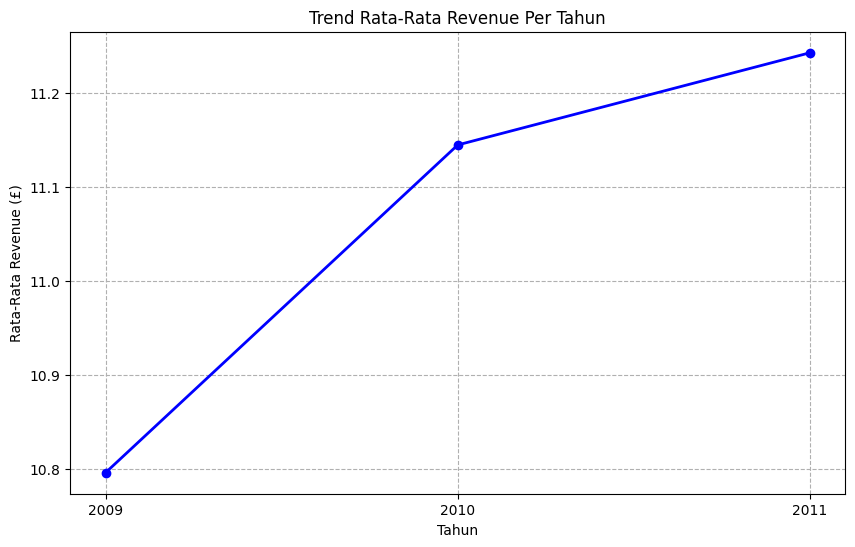

In [26]:
# Menghitung rata-rata Revenue per tahun
average_revenue_per_year = sales.groupby('Year')['Revenue'].mean()
average_revenue_per_year

# Membuat plot line chart untuk rata-rata Revenue per tahun dengan label tahun tanpa desimal
plt.figure(figsize=(10, 6))
plt.plot(average_revenue_per_year.index, average_revenue_per_year.values, marker='o', color='b', linestyle='-', linewidth=2)
plt.title('Trend Rata-Rata Revenue Per Tahun')
plt.xlabel('Tahun')
plt.ylabel('Rata-Rata Revenue (£)')
plt.xticks(average_revenue_per_year.index, [str(int(year)) for year in average_revenue_per_year.index])  # Mengubah label tahun menjadi integer
plt.grid(axis='both', linestyle='--')
plt.show()

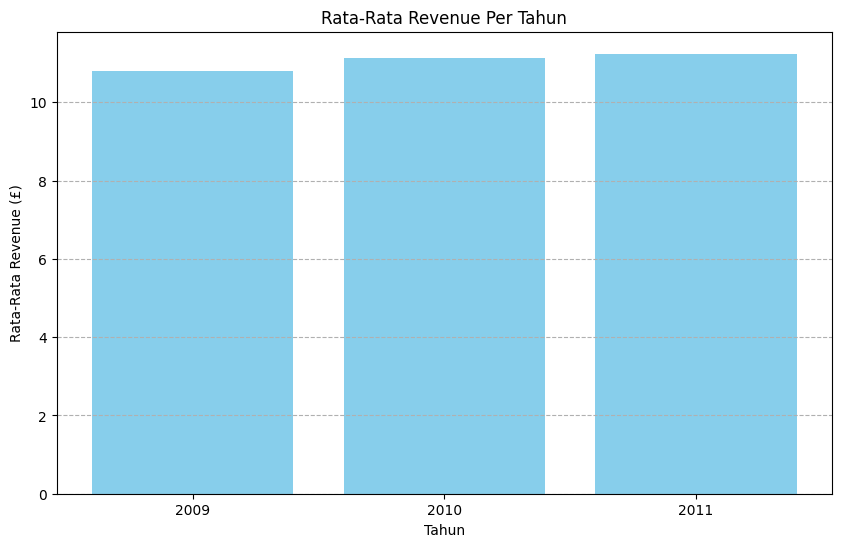

In [27]:
# Membuat plot bar chart untuk rata-rata Revenue per tahun dengan label tahun tanpa desimal
plt.figure(figsize=(10, 6))
plt.bar(average_revenue_per_year.index, average_revenue_per_year.values, color='skyblue')
plt.title('Rata-Rata Revenue Per Tahun')
plt.xlabel('Tahun')
plt.ylabel('Rata-Rata Revenue (£)')
plt.xticks(average_revenue_per_year.index, [str(int(year)) for year in average_revenue_per_year.index])  # Mengubah label tahun menjadi integer
plt.grid(axis='y', linestyle='--')
plt.show()

#**Interpretasi plot**

Dalam periode tiga tahun dari 2009 hingga 2011, trend rata-rata revenue menunjukkan pertumbuhan yang positif dan stabil. Pada tahun 2009, revenue rata-rata tercatat sebesar 10.795718, yang kemudian mengalami peningkatan menjadi 11.144632 pada tahun 2010. Meskipun pertumbuhan ini tampaknya kecil, itu menandai awal dari trend positif yang berlanjut ke tahun berikutnya. Pada tahun 2011, trend ini terus berlanjut dengan peningkatan lebih lanjut menjadi 11.242782. Meskipun pertumbuhan tahunan tidak signifikan, konsistensi dalam peningkatan menunjukkan kondisi bisnis yang sehat dan pertumbuhan yang berkelanjutan. Keseluruhan trend ini menggambarkan sebuah gambaran bisnis yang sedang dalam fase pertumbuhan, di mana upaya untuk meningkatkan revenue terus berbuah hasil positif dari tahun ke tahun.

Selain itu, tren ini mungkin juga terkait dengan kondisi ekonomi atau pasar yang menguntungkan, seperti pemulihan ekonomi atau peningkatan permintaan konsumen dalam industri ritel online. Namun, penting untuk menggabungkan analisis ini dengan faktor lain seperti biaya operasional, margin laba, dan tren industri untuk mendapatkan gambaran yang lebih lengkap tentang performa bisnis. Tanpa informasi tambahan tentang produk yang dijual, demografi pelanggan, kompetitor, dan faktor lain yang mungkin mempengaruhi penjualan, analisis ini tetap bersifat umum. Secara keseluruhan, tren kenaikan rata-rata Revenue menunjukkan dinamika positif dalam penjualan dan mungkin mencerminkan kesehatan bisnis yang baik, meskipun interpretasi ini harus dipahami dalam konteks yang lebih luas, termasuk faktor-faktor eksternal dan internal yang mungkin mempengaruhi performa penjualan.

In [32]:
# Langkah 1: Filtering data sales dengan ketentuan CustomerID tidak boleh kosong atau null
finished = sales[sales['Customer ID'] != 0]

# Menampilkan 5 baris pertama dari dataset yang telah difilter
finished.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Year,Revenue
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12.0,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,2009,83.4
1,489434,79323P,PINK CHERRY LIGHTS,12.0,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,2009,81.0
2,489434,79323W,WHITE CHERRY LIGHTS,12.0,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,2009,81.0
7,489434,21523,FANCY FONT HOME SWEET HOME DOORMAT,10.0,2009-12-01 07:45:00,5.95,13085.0,United Kingdom,2009,59.5
8,489435,22350,CAT BOWL,12.0,2009-12-01 07:46:00,2.55,13085.0,United Kingdom,2009,30.6


In [33]:
# Langkah 2: Filtering data untuk mendeteksi kolom Invoice mengandung huruf 'C'
cancel = df[df['Invoice'].str.contains('C')]

# Menampilkan 5 baris pertama dari dataset yang telah difilter
cancel.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Year
178,C489449,22087,PAPER BUNTING WHITE LACE,-12.0,2009-12-01 10:33:00,2.95,16321.0,Australia,2009
179,C489449,85206A,CREAM FELT EASTER EGG BASKET,-6.0,2009-12-01 10:33:00,1.65,16321.0,Australia,2009
180,C489449,21895,POTTING SHED SOW 'N' GROW SET,-4.0,2009-12-01 10:33:00,4.25,16321.0,Australia,2009
181,C489449,21896,POTTING SHED TWINE,-6.0,2009-12-01 10:33:00,2.10,16321.0,Australia,2009
182,C489449,22083,PAPER CHAIN KIT RETRO SPOT,-12.0,2009-12-01 10:33:00,2.95,16321.0,Australia,2009


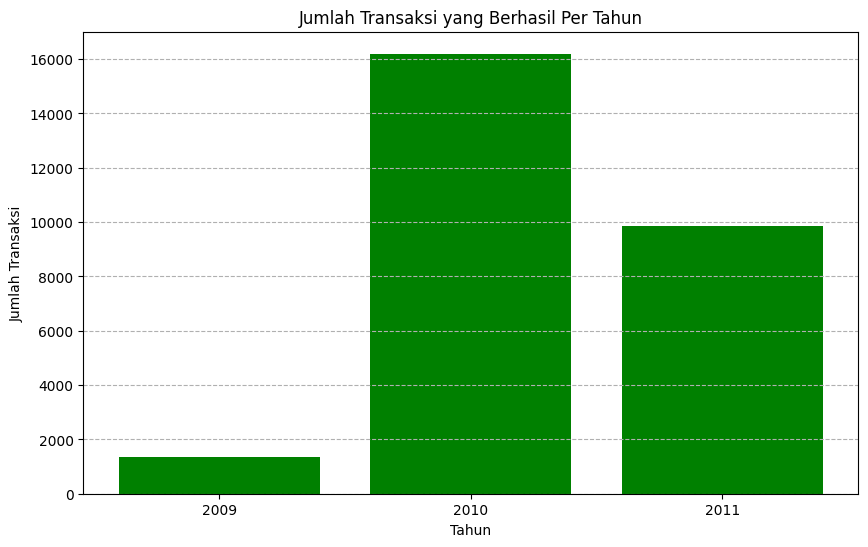

Year
2009     1343
2010    16199
2011     9842
Name: Invoice, dtype: int64

In [34]:
# Menghitung jumlah transaksi yang berhasil (dari variabel finished) untuk setiap tahunnya
successful_transactions_per_year = finished.groupby('Year')['Invoice'].nunique()

# Membuat plot bar chart untuk jumlah transaksi yang berhasil per tahun
plt.figure(figsize=(10, 6))
plt.bar(successful_transactions_per_year.index, successful_transactions_per_year.values, color='green')
plt.title('Jumlah Transaksi yang Berhasil Per Tahun')
plt.xlabel('Tahun')
plt.ylabel('Jumlah Transaksi')
plt.xticks(successful_transactions_per_year.index, [str(int(year)) for year in successful_transactions_per_year.index])  # Mengubah label tahun menjadi integer
plt.grid(axis='y', linestyle='--')
plt.show()

# Menampilkan jumlah transaksi yang berhasil per tahun dalam bentuk tabel
successful_transactions_per_year

Dalam periode tiga tahun yang ditinjau, jumlah transaksi berhasil menunjukkan fluktuasi yang signifikan. Pada tahun 2009, tercatat hanya 1.343 transaksi yang berhasil, menetapkan dasar yang rendah untuk periode yang diteliti. Namun, terjadi peningkatan yang luar biasa pada tahun 2010, dengan 16.199 transaksi berhasil, menandai pertumbuhan yang cepat dan mungkin mencerminkan perluasan bisnis atau strategi pemasaran yang berhasil. Meskipun demikian, trend ini tidak bertahan, dan tahun 2011 melihat penurunan jumlah transaksi menjadi 9.842. Meskipun ini masih jauh di atas tingkat tahun 2009, penurunan ini mungkin menunjukkan perubahan kondisi pasar, peningkatan persaingan, atau faktor lain yang mempengaruhi performa bisnis. Secara keseluruhan, data ini menunjukkan dinamika pasar yang kompleks dan perubahan yang cepat dalam jumlah transaksi, yang mungkin memerlukan analisis lebih lanjut untuk memahami sepenuhnya faktor-faktor yang berkontribusi terhadap fluktuasi ini.

In [35]:
# Menghitung jumlah customer unik yang berhasil (tidak membatalkan) untuk setiap tahunnya
successful_customers_per_year = finished.groupby('Year')['Customer ID'].nunique()
cancelled_customers_per_year = cancel.groupby('Year')['Customer ID'].nunique()

# Menghitung jumlah seluruh customer unik untuk setiap tahunnya
total_customers_per_year = successful_customers_per_year + cancelled_customers_per_year

# Menghitung cancellation rate untuk setiap tahunnya
cancellation_rate_corrected = (cancelled_customers_per_year / total_customers_per_year) * 100

# Menampilkan cancellation rate per tahun dalam bentuk tabel
cancellation_rate_corrected

Year
2009    21.746725
2010    25.853838
2011    22.785433
Name: Customer ID, dtype: float64

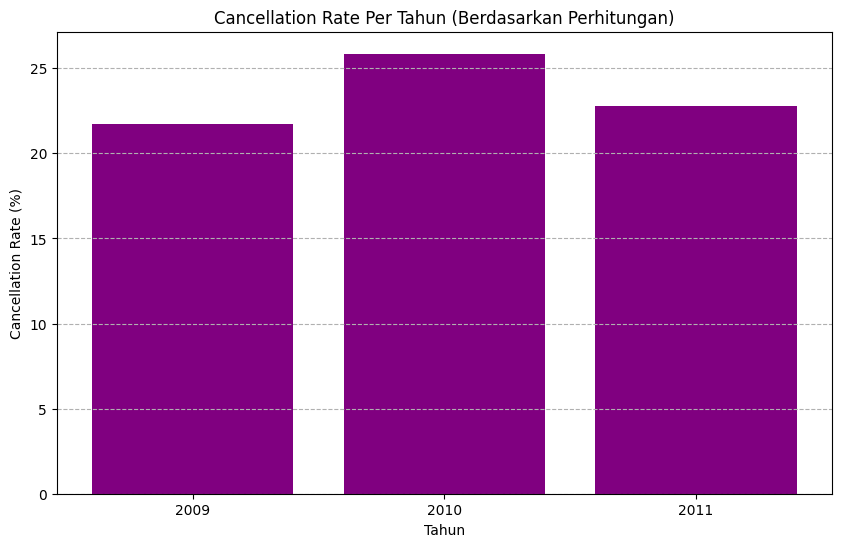

In [36]:
# Membuat plot bar chart untuk cancellation rate per tahun berdasarkan perhitungan yang telah dilakukan
plt.figure(figsize=(10, 6))
plt.bar(cancellation_rate_corrected.index, cancellation_rate_corrected.values, color='purple')
plt.title('Cancellation Rate Per Tahun (Berdasarkan Perhitungan)')
plt.xlabel('Tahun')
plt.ylabel('Cancellation Rate (%)')
plt.xticks(cancellation_rate_corrected.index, [str(int(year)) for year in cancellation_rate_corrected.index])  # Mengubah label tahun menjadi integer
plt.grid(axis='y', linestyle='--')
plt.show()

Selama periode tiga tahun dari 2009 hingga 2011, tingkat pembatalan menunjukkan fluktuasi yang menarik. Pada tahun 2009, tingkat pembatalan sebesar 21.75% menetapkan patokan awal untuk periode yang diteliti. Tahun berikutnya, 2010, melihat peningkatan dalam tingkat pembatalan menjadi 25.85%, yang mungkin mencerminkan perubahan dalam kebijakan pembatalan, kondisi pasar, atau perilaku pelanggan. Namun, pada tahun 2011, tingkat pembatalan turun sedikit menjadi 22.79%, mendekati level tahun 2009. Penurunan ini mungkin menunjukkan penyesuaian dalam strategi bisnis atau perubahan dalam dinamika pasar. Secara keseluruhan, fluktuasi ini dalam tingkat pembatalan menunjukkan bahwa ada faktor-faktor kompleks yang bekerja dalam bisnis ini, dan analisis lebih lanjut mungkin diperlukan untuk memahami dengan tepat apa yang menyebabkan perubahan ini. Interpretasi ini dapat menjadi dasar untuk eksplorasi lebih lanjut tentang bagaimana meningkatkan retensi pelanggan dan mengurangi pembatalan di masa depan.